In [1]:
import traffic_light_detector
from PIL import Image
import numpy as np

In [2]:
# Train the model using the test.record dataset with labels
import importlib
importlib.reload(traffic_light_detector)

#tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_coco_2018_01_28', 'mscoco_label_map')
#tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_bosch', 'bosch_label_map')
#tl = traffic_light_detector.TLDetector('ssd_mobilenet_v2_bosch', 'bosch_label_map')

tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_udacity_real', 'udacity_label_map')

In [5]:
# Import image data files
import glob
import random

image_fnames = glob.glob("../../../data/udacity/*.jpg")
#image_fnames = glob.glob("../../../data/bosch/rgb/test/*")
#random.shuffle(image_fnames)
#image_fnames = image_fnames[:5]

print(image_fnames)

['../../../data/udacity/left0000.jpg', '../../../data/udacity/left0140.jpg', '../../../data/udacity/left0183.jpg']


In [6]:
# Perform classification of each image

detections = []

for image_path in image_fnames:
    image = Image.open(image_path)
    image_np = traffic_light_detector.load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    print("Running inference on %s" % image_path)
    output_dict = tl.run_inference_for_single_image(image_np)
    detections.append({"ImagePath": image_path, "Image_NP": image_np, "output_dict": output_dict})

Running inference on ../../../data/udacity/left0000.jpg
Running inference on ../../../data/udacity/left0140.jpg
Running inference on ../../../data/udacity/left0183.jpg


{1: {'name': 'Green', 'id': 1}, 2: {'name': 'Red', 'id': 2}, 3: {'name': 'Yellow', 'id': 3}, 4: {'name': 'off', 'id': 4}}
{'num_detections': 300, 'detection_boxes': array([[0.38134336, 0.4730079 , 0.43032253, 0.48649994],
       [0.38458407, 0.4706937 , 0.43963996, 0.48646912],
       [0.38662267, 0.46790245, 0.43525437, 0.4862764 ],
       ...,
       [0.9135788 , 0.8248029 , 0.9851657 , 0.8584676 ],
       [0.946214  , 0.76624185, 1.        , 0.7961937 ],
       [0.40737364, 0.01123084, 0.547246  , 0.02600384]], dtype=float32), 'detection_scores': array([8.80666673e-01, 1.68213397e-01, 6.93366770e-03, 3.88191408e-03,
       3.81279550e-03, 2.68362951e-03, 1.67201782e-04, 2.98691211e-05,
       2.74113827e-05, 2.07123430e-05, 1.07809792e-05, 1.07681285e-06,
       1.06119262e-06, 1.05949186e-06, 9.36298420e-07, 9.34201410e-07,
       6.93847824e-07, 6.41415568e-07, 5.58120234e-07, 3.54407661e-07,
       2.41017545e-07, 2.08431260e-07, 1.48770823e-07, 1.12379396e-07,
       1.06646574e

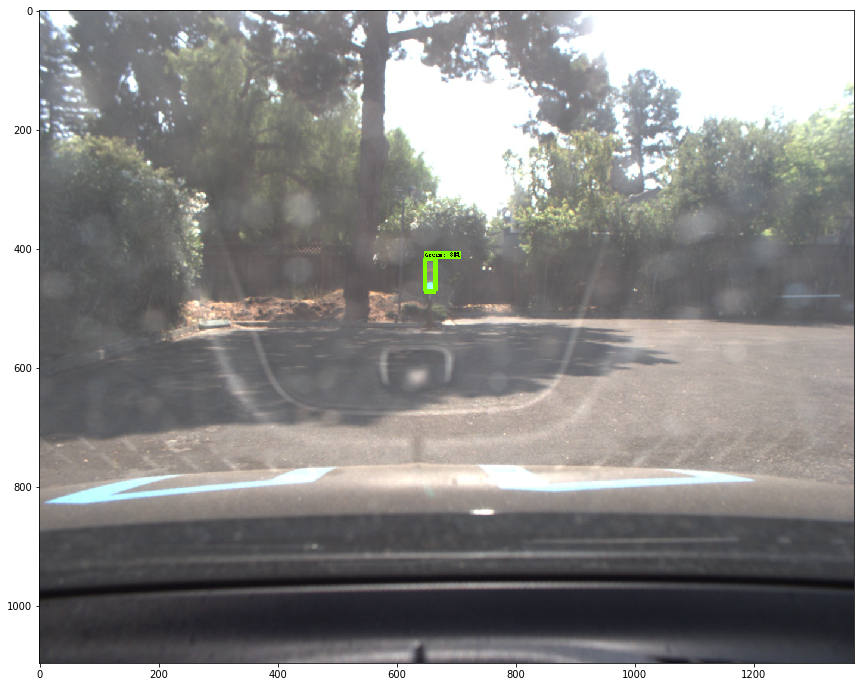

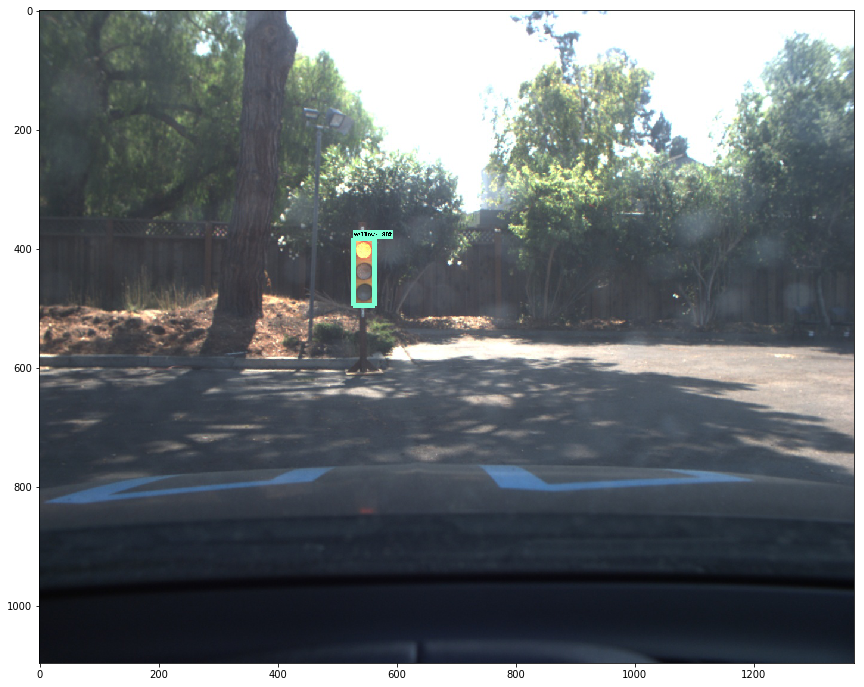

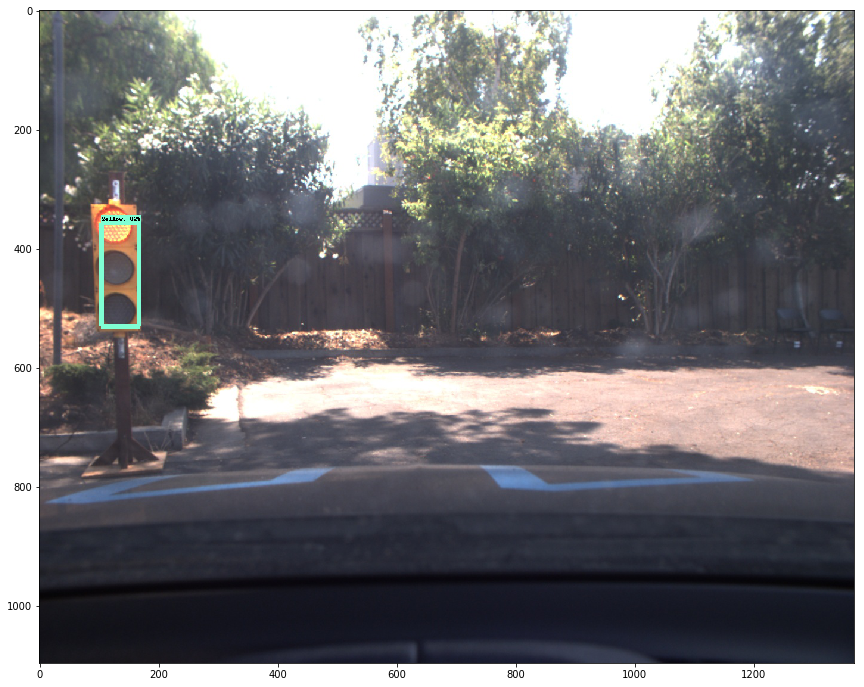

In [8]:
# Visualize
%matplotlib inline
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from matplotlib import pyplot as plt

MAX_NUM_CLASSES=90 #arbitrary number, not that important

label_map = label_map_util.load_labelmap(tl.labels_path)
categories = label_map_util.convert_label_map_to_categories(label_map, MAX_NUM_CLASSES)
category_index = label_map_util.create_category_index(categories)
print(category_index)
IMAGE_SIZE = (18, 12)

for detection in detections:
    image_np = detection["Image_NP"]
    output_dict = detection["output_dict"]
    
    vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks'),
          use_normalized_coordinates=True,
          line_thickness=8,
          min_score_thresh=0.5)
    print(output_dict)
    
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

In [6]:
# Save model